In [1]:
!pip install kaggle

chmod: missing operand after ‘600~/.kaggle/kaggle.json’
Try 'chmod --help' for more information.


In [1]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!ls

kaggle.json  sample_data


In [3]:
!kaggle competitions download -c dogs-vs-cats

100% 809M/812M [00:07<00:00, 166MB/s]
100% 812M/812M [00:07<00:00, 120MB/s]


In [4]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [5]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


In [8]:
#printing the name of the images
file_names = os.listdir('/content/train/')
print(file_names)

['cat.10141.jpg', 'dog.12265.jpg', 'dog.10526.jpg', 'cat.6319.jpg', 'dog.5417.jpg', 'dog.6806.jpg', 'cat.7097.jpg', 'dog.654.jpg', 'cat.6352.jpg', 'cat.12303.jpg', 'cat.291.jpg', 'dog.11255.jpg', 'cat.11156.jpg', 'cat.3584.jpg', 'cat.387.jpg', 'cat.2817.jpg', 'cat.2163.jpg', 'cat.6706.jpg', 'dog.4988.jpg', 'cat.9946.jpg', 'dog.6481.jpg', 'cat.7340.jpg', 'dog.7930.jpg', 'dog.3866.jpg', 'cat.5277.jpg', 'cat.2518.jpg', 'dog.11935.jpg', 'dog.4905.jpg', 'dog.3110.jpg', 'dog.5023.jpg', 'cat.1881.jpg', 'cat.936.jpg', 'dog.2375.jpg', 'cat.10249.jpg', 'cat.10638.jpg', 'cat.1731.jpg', 'dog.12102.jpg', 'cat.7327.jpg', 'cat.12451.jpg', 'dog.3298.jpg', 'dog.7808.jpg', 'cat.11666.jpg', 'dog.525.jpg', 'dog.10348.jpg', 'dog.3538.jpg', 'cat.10950.jpg', 'dog.11369.jpg', 'cat.7503.jpg', 'cat.6161.jpg', 'cat.6475.jpg', 'cat.4945.jpg', 'cat.8398.jpg', 'cat.3591.jpg', 'dog.4285.jpg', 'dog.6529.jpg', 'dog.2852.jpg', 'cat.12014.jpg', 'dog.2569.jpg', 'dog.8814.jpg', 'dog.3737.jpg', 'dog.2863.jpg', 'dog.6176.jp

In [9]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

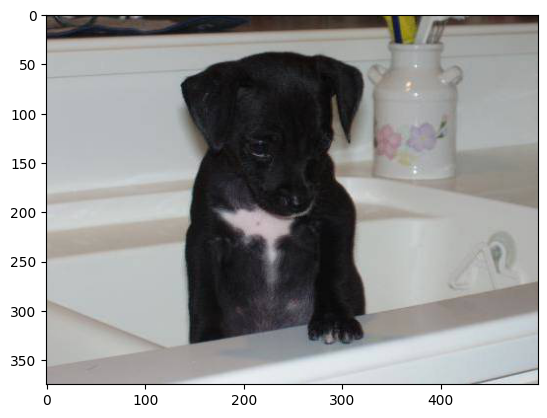

In [22]:
# display dog image
img = mpimg.imread('/content/train/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

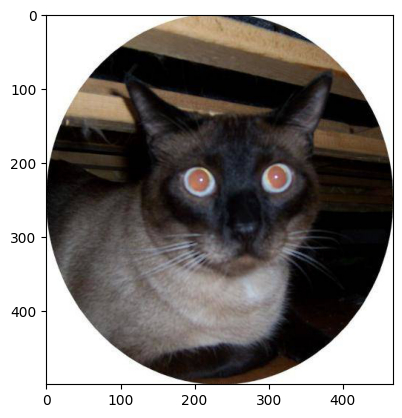

In [26]:
# display cat image
img = mpimg.imread('/content/train/cat.10141.jpg')
imgplt = plt.imshow(img)
plt.show()

In [24]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i]
  print(name[0:3])

cat
dog
cat
dog
dog


In [12]:
file_names = os.listdir('/content/train/')

dog_count=0
cat_count=0

for img_file in file_names:

  name= img_file[0:3]

  if name=='dog':
    dog_count+=1

  else:
    cat_count+=1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)




Number of dog images = 12500
Number of cat images = 12500


In [13]:
#Resizing all the images
#creating a directory for resized images

os.mkdir('/content/image_resized')

In [22]:
#selecting only 2000 files
original_folder='/content/train/'
resized_folder='/content/image_resized/'


for i in range(2000):

  filename=os.listdir(original_folder)[i]
  img_path=original_folder+filename

  img=Image.open(img_path)
  img=img.resize((224, 224))
  img=img.convert('RGB')

  newimgpath= resized_folder+filename
  img.save(newimgpath)

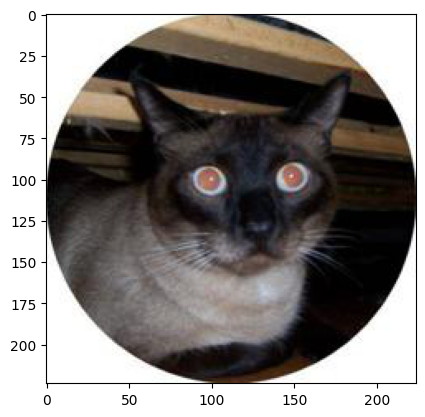

In [25]:
# display cat image
img = mpimg.imread('/content/image_resized/cat.10141.jpg')
imgplt = plt.imshow(img)
plt.show()

In [24]:
file_names = os.listdir('/content/image_resized/')
print(file_names)

['cat.10141.jpg', 'dog.12265.jpg', 'dog.10526.jpg', 'cat.6319.jpg', 'dog.5417.jpg', 'dog.6806.jpg', 'cat.7097.jpg', 'dog.654.jpg', 'cat.6352.jpg', 'cat.12303.jpg', 'cat.291.jpg', 'dog.11255.jpg', 'cat.11156.jpg', 'cat.3584.jpg', 'cat.387.jpg', 'cat.2817.jpg', 'cat.2163.jpg', 'cat.6706.jpg', 'dog.4988.jpg', 'cat.9946.jpg', 'dog.6481.jpg', 'cat.7340.jpg', 'dog.7930.jpg', 'dog.3866.jpg', 'cat.5277.jpg', 'cat.2518.jpg', 'dog.11935.jpg', 'dog.4905.jpg', 'dog.3110.jpg', 'dog.5023.jpg', 'cat.1881.jpg', 'cat.936.jpg', 'dog.2375.jpg', 'cat.10249.jpg', 'cat.10638.jpg', 'cat.1731.jpg', 'dog.12102.jpg', 'cat.7327.jpg', 'cat.12451.jpg', 'dog.3298.jpg', 'dog.7808.jpg', 'cat.11666.jpg', 'dog.525.jpg', 'dog.10348.jpg', 'dog.3538.jpg', 'cat.10950.jpg', 'dog.11369.jpg', 'cat.7503.jpg', 'cat.6161.jpg', 'cat.6475.jpg', 'cat.4945.jpg', 'cat.8398.jpg', 'cat.3591.jpg', 'dog.4285.jpg', 'dog.6529.jpg', 'dog.2852.jpg', 'cat.12014.jpg', 'dog.2569.jpg', 'dog.8814.jpg', 'dog.3737.jpg', 'dog.2863.jpg', 'dog.6176.jp

In [29]:
#creating the label for resized images of dogs and cats.
#cat=0 and dog=1

filenames=os.listdir('/content/image_resized')
labels=[]

for i in range(2000):
  file_name=filenames[i]
  label=file_name[0:3]


  if label =='dog':
    labels.append(1)

  else:
    labels.append(0)

In [33]:
print(filenames[0:5])
print(len(filenames))

['cat.10141.jpg', 'dog.12265.jpg', 'dog.10526.jpg', 'cat.6319.jpg', 'dog.5417.jpg']
2000


In [34]:
print(labels[0:5])
print(len(labels))

[0, 1, 1, 0, 1]
2000


In [37]:
#counting the images of dogs and cats in the folder.
values, counts= np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1020  980]


In [38]:
import cv2
import glob

In [39]:
image_directory='/content/image_resized/'
image_extension=['png', 'jpg']

files=[]

#to read all the images
#
[files.extend(glob.glob(image_directory+'*.'+e)) for e in image_extension]

dog_cat_images=np.asarray([cv2.imread(file) for file in files])

In [41]:
type(dog_cat_images)

numpy.ndarray

In [42]:
dog_cat_images.shape

(2000, 224, 224, 3)

In [43]:
X=dog_cat_images
Y=np.asarray(labels)

In [45]:
#Train test split
x_train, x_test, y_train,y_test=train_test_split(X, Y, test_size=0.2, random_state=2)


In [47]:
print(X.shape,x_train.shape, x_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [48]:
#scaling the data

x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [49]:
print(x_train_scaled)

[[[[0.48235294 0.4745098  0.43529412]
   [0.47843137 0.47058824 0.43137255]
   [0.47843137 0.47058824 0.43137255]
   ...
   [0.10196078 0.08235294 0.07058824]
   [0.10196078 0.08235294 0.07058824]
   [0.10196078 0.08235294 0.07058824]]

  [[0.48235294 0.4745098  0.43529412]
   [0.47843137 0.47058824 0.43137255]
   [0.47843137 0.47058824 0.43137255]
   ...
   [0.10196078 0.08235294 0.07058824]
   [0.10196078 0.08235294 0.07058824]
   [0.10196078 0.08235294 0.07058824]]

  [[0.48235294 0.4745098  0.43529412]
   [0.47843137 0.47058824 0.43137255]
   [0.47843137 0.47058824 0.43137255]
   ...
   [0.10196078 0.08235294 0.07058824]
   [0.10196078 0.08235294 0.07058824]
   [0.10196078 0.08235294 0.07058824]]

  ...

  [[0.09019608 0.07058824 0.03529412]
   [0.08235294 0.07058824 0.03921569]
   [0.08235294 0.06666667 0.04705882]
   ...
   [0.23529412 0.19607843 0.15686275]
   [0.18039216 0.14117647 0.10196078]
   [0.22745098 0.18823529 0.14901961]]

  [[0.09019608 0.0745098  0.03137255]
   [0.0

In [50]:
#Building a neural network


import tensorflow as tf
import tensorflow_hub as hub

In [51]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [52]:
num_of_classes=2
model=tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [53]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [55]:
model.fit(x_train_scaled, y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 91s 2s/step - loss: 0.2357 - acc: 0.8913
Epoch 2/5
50/50 [==============================] - 73s 1s/step - loss: 0.0759 - acc: 0.9769
Epoch 3/5
50/50 [==============================] - 75s 2s/step - loss: 0.0578 - acc: 0.9825
Epoch 4/5
50/50 [==============================] - 95s 2s/step - loss: 0.0472 - acc: 0.9856
Epoch 5/5
50/50 [==============================] - 113s 2s/step - loss: 0.0411 - acc: 0.9906


In [57]:
score, acc = model.evaluate(x_test_scaled, y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 19s 1s/step - loss: 0.0699 - acc: 0.9775
Test Loss = 0.06988044083118439
Test Accuracy = 0.9775000214576721


Path of the image to be predicted: /content/download.jpeg


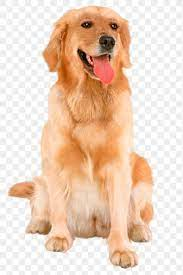

1/1 [==============================] - 1s 763ms/step
[[-2.8164241  2.7167363]]
1
The image represents a Dog


In [60]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')